# Snow removal

In [1]:
#Please note that this cell can be ignored if you installed neural_de from pip
import sys
sys.path.append("..")
import time

### Imports

In [2]:
import cv2

import matplotlib.pyplot as plt
from pathlib import Path
from neural_de.transformations import DeSnowEnhancer

2025-03-06 17:39:43.178338: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 17:39:43.191978: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741282783.211443    2141 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741282783.217224    2141 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 17:39:43.235648: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Image enhancement
**1. Load your corrupted image**

In [3]:
start=time.time()
input_path = Path('../examples/images/corrupted_truck.png')
corrupted_image = cv2.imread(str(input_path))
# Channel reordering 
corrupted_image = corrupted_image[:, :, ::-1]

Text(0.5, 1.0, '(531, 416, 3)')

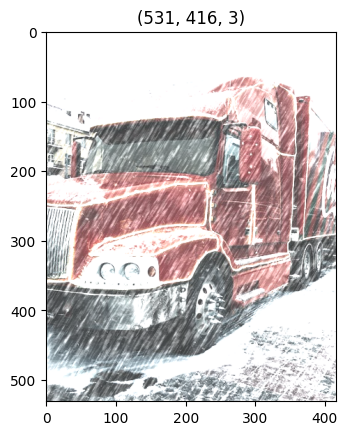

In [4]:
plt.imshow(corrupted_image) 
plt.title(corrupted_image.shape)

**2. Initialize the purifier**
   
- Please note that this method require an access to MinIO in order to retrieve model's weights (at least the first time you launch the library). Once the download is complete you can comment or remove the following cell. The model will be stored locally.

In [5]:
purifier = DeSnowEnhancer()
# batch size = 1
purified_image = purifier.transform([corrupted_image])

[03-06 17:39:46] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[03-06 17:39:46] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/transformations/_desnow_enhancer.py:41} INFO - Checking model availability...
[03-06 17:39:46] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/utils/_minio.py:58} INFO - Model prenet_latest.pth not found locally or corrupted, downloading it from server
[03-06 17:39:46] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/utils/_minio.py:79} INFO - Model downloaded and validated
[03-06 17:39:46] {/home/jovyan/Maturation/env-testneural_github312/lib/python3.12/site-packages/neural_de/transformations/_desnow_enhancer.py:56} INFO - Loading model. Using cpu 

[03-06 17:39:46] {/home/jovyan/Maturation/

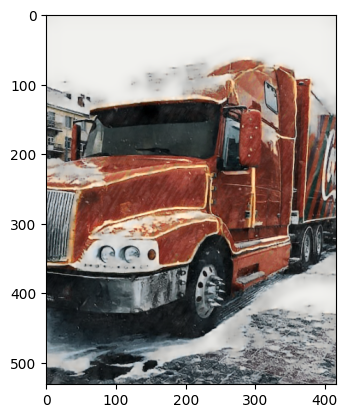

In [6]:
plt.imshow(purified_image[0])

In [7]:
end=time.time()
print("temps final : ",end-start)

temps final :  4.170902729034424
